ChEn-3170: Computational Methods in Chemical Engineering Spring 2024 UMass Lowell; Prof. V. F. de Almeida **03Feb24**

# 04. Array Operations
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\vvec}{\boldsymbol{\mathsf{v}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Formatting Output](#format)
   + `Numpy` `set_printoptions()` method
* [Vectors](#vectors)
   + [Element-by-element addition/subtraction](#vecaddsub)
   + [Element-by-element product/division](#vecproddiv)
   + [Self product](#vecselfprod)
   + [Inner product (dot product)](#vecinnerprod)
   + [Scaling (element-by-element multiplication/division by scalar)](#vecscale)
   + [Element-by-element mathematical operations](#vecops)
   + [Element-by-element search](#vecsearch)
   + [Zip vectors](#veczip)
* [Matrices](#matrices)
   + [Element-by-element addition/subtraction](#mataddsub)
   + [Element-by-element product/division](#matproddiv)
   + [Scaling (element-by-element multiplication/division by scalar)](#matscale)
   + [Element-by-element mathematical operations](#matops)
   + [Transposition](#mattransp)
     - `Numpy` `set_printoptions()` method
   + [Element-by-element search](#matsearch)
---

## [Objectives](#toc)<a id="obj"></a>

 + Cover basic array operations in 1-D (vectors) and 2-D (matrices) needed throughout the course.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

## [Formatting Output](#toc)<a id="format"></a>

* Scientific notation

In [2]:
import math

pi = math.pi

print('pi = %15.5e'%pi) # formatting numeric output: scientific notation

pi =     3.14159e+00


In [3]:
print('pi = %10.5f'%pi) # formatting numeric output: float

pi =    3.14159


In [4]:
print('pi = %10.5e and e = %8.3f'%(pi, math.e)) # formatting numeric output: sci. notation and float

pi = 3.14159e+00 and e =    2.718


* `Numpy` arrays

In [6]:
'''Use set print options in Numpy'''

np.set_printoptions(precision=4, threshold=800, edgeitems=6, linewidth=105)

mtrx = np.random.random((10,100))

print(mtrx)

[[0.4879 0.5032 0.6711 0.2053 0.3953 0.4113 ... 0.1691 0.4088 0.3806 0.5383 0.8801 0.1952]
 [0.5615 0.4903 0.8616 0.6578 0.5512 0.2653 ... 0.423  0.7854 0.7429 0.3367 0.4356 0.1462]
 [0.964  0.1937 0.0277 0.3127 0.4967 0.5606 ... 0.7955 0.8762 0.9858 0.686  0.4021 0.6587]
 [0.5514 0.6079 0.7796 0.113  0.8617 0.6741 ... 0.0745 0.9819 0.2524 0.6808 0.5542 0.7257]
 [0.6117 0.3846 0.6405 0.2552 0.7619 0.3005 ... 0.699  0.8505 0.5365 0.4789 0.6551 0.5136]
 [0.5957 0.7365 0.2312 0.1863 0.2584 0.1664 ... 0.965  0.1121 0.316  0.4431 0.3348 0.215 ]
 [0.4149 0.1759 0.2105 0.4495 0.5184 0.3971 ... 0.0569 0.8808 0.7022 0.9123 0.7745 0.7815]
 [0.407  0.0827 0.5736 0.9367 0.2285 0.1067 ... 0.935  0.0169 0.3705 0.2195 0.34   0.116 ]
 [0.6679 0.3542 0.6968 0.0113 0.5137 0.7043 ... 0.1328 0.155  0.1222 0.0426 0.9056 0.3971]
 [0.7895 0.7837 0.9834 0.1702 0.9152 0.0281 ... 0.8208 0.3807 0.9598 0.1603 0.3551 0.9886]]


In [ ]:
#help(np.set_printoptions)

## [Vectors](#toc)<a id="vectors"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [7]:
'''Set double precision at creation time'''

x_vec = np.empty(10, dtype=np.float64)

print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [8]:
'''Set double precision after creation'''

x_vec = x_vec.astype(float)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [9]:
'''Set single precision after creation; not to be used'''

x_vec = x_vec.astype(np.float32)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float32


#### [Element-by-element addition/subtraction](#toc)<a id="vecaddsub"></a>

In [10]:
'''Element-by-element addition or subtraction'''

vec1 = np.array(np.random.random(5))
print('vec1     =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2     =',vec2)

result = vec1 + vec2         # element-by-element sum
print('addition   =',result)

result = vec1 - vec2         # element-by-element subtraction
print('difference =',result)

vec1     = [0.9567 0.7066 0.7777 0.0704 0.5389]
vec2     = [0.1022 0.2712 0.0438 0.6736 0.3185]
addition   = [1.0589 0.9778 0.8214 0.744  0.8574]
difference = [ 0.8546  0.4354  0.7339 -0.6032  0.2204]


#### [Element-by-element product/division](#toc)<a id="vecproddiv"></a>

In [11]:
'''Element-by-element product or division'''

vec1 = np.array(np.random.random(5))
print('vec1    =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2    =',vec2)

result = vec1 * vec2        # element-by-element product
print('product  =',result)

result = vec1 / vec2        # element-by-element division
print('division =',result)

vec1    = [0.8916 0.25   0.8331 0.4279 0.6627]
vec2    = [0.4749 0.2034 0.6134 0.1667 0.9124]
product  = [0.4234 0.0508 0.5111 0.0713 0.6047]
division = [1.8774 1.2293 1.3582 2.5666 0.7263]


#### [Self product](#toc)<a id="vecselfprod"></a>

In [12]:
'''Product of all elements of a vector'''

vec1_prod = np.prod(vec1)

print('vec1         =', vec1)
print('vec1 product =', vec1_prod)

vec1         = [0.8916 0.25   0.8331 0.4279 0.6627]
vec1 product = 0.05265645600495153


#### [Inner product (dot product)](#toc)<a id="vecinnerprod"></a>

The result of the inner product of two vectors: $\vvec_1 \cdot \vvec_2$ is a scalar.

In [13]:
'''Vector inner product or dot product'''

vec1 = np.array(np.random.random(5))
print('vec1           =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2           =',vec2)

result = np.dot(vec1, vec2)     # inner or dot product
print('dot product =',result)

vec1           = [0.0564 0.1891 0.4979 0.2794 0.4141]
vec2           = [0.0096 0.5207 0.4705 0.8304 0.3342]
dot product = 0.7036336286374606


In [14]:
'''More on vector inner product or dot product'''
'''Another way to compute the inner product'''

ele_by_ele_product_vec = vec1 * vec2

inner_product = ele_by_ele_product_vec.sum()

print('vec1 . vec2 = ', inner_product)

vec1 . vec2 =  0.7036336286374606


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="vecscale"></a>

In [15]:
'''Scaling of a vector'''

vec = np.array(np.random.random(5))
print('vec    =',vec)

factor = 0.345
scaled = factor * vec     # scaling of vec element-by-element product
print('scaled =', scaled) # assigned to new variable `scaled`

vec *= factor          # in-place scaling
print('vec    =',vec)

vec    = [0.8178 0.0493 0.3583 0.5272 0.3116]
scaled = [0.2821 0.017  0.1236 0.1819 0.1075]
vec    = [0.2821 0.017  0.1236 0.1819 0.1075]


#### [Element-by-element mathematical operations](#toc)<a id="vecops"></a>

In [16]:
'''Mathematical Operations on a Vector'''

vec = np.array(np.random.random(5))
print('vec      =',vec)

log_vec = np.log(vec)         # natural log element-by-element
print('log(vec) =',log_vec)

exp_vec = np.exp(log_vec)     # exponential
print('exp(vec) =',exp_vec)

sin_vec = np.sin(vec)         # sine
print('sin(vec) =',sin_vec)

vec_cubed = vec**3            # powers
print('vec^3    =',vec_cubed)

vec_mean = vec.mean()         # arithmetic mean
print('mean(vec) =',vec_mean)

vec_std = vec.std()           # standard deviation
print('std(vec) =',vec_std)

vec      = [0.9019 0.414  0.5079 0.1025 0.7218]
log(vec) = [-0.1032 -0.882  -0.6775 -2.2779 -0.3261]
exp(vec) = [0.9019 0.414  0.5079 0.1025 0.7218]
sin(vec) = [0.7845 0.4022 0.4863 0.1023 0.6607]
vec^3    = [0.7336 0.0709 0.131  0.0011 0.376 ]
mean(vec) = 0.5296039335106147
std(vec) = 0.2726881579395162


#### [Element-by-element search](#toc)<a id="vecsearch"></a>

In [17]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] >= 0.3
(idx_ids, ) = np.where(vec >= 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.9019 0.414  0.5079 0.1025 0.7218]
indices =  [0 1 2 4]


In [18]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] == 0.3
(idx_ids, ) = np.where(vec == 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.9019 0.414  0.5079 0.1025 0.7218]
indices =  []


#### [Zip vectors](#toc)<a id="veczip"></a>

In [19]:
'''Zip creates a list of tuples on the fly'''

print(list(zip(vec1, vec2)))

[(0.05638591126518866, 0.009573951084459242), (0.18907523959707617, 0.5207225592422888), (0.4979043076466918, 0.4705131647768699), (0.27937521677129185, 0.830359550548796), (0.41411363833542814, 0.3341731018700764)]


## [Matrices](#toc)<a id="matrices"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [20]:
'''Set double precision at creation time'''

mtrx = np.empty((5,5), dtype=np.float64)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


In [21]:
'''Set double precision after creation'''

mtrx = mtrx.astype(float)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


#### [Element-by-element addition/subtraction](#toc)<a id="mataddsub"></a>

In [22]:
'''Element-by-element addition or subtraction'''

mat1 = np.random.random((3,3))
print('mat1       =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2       =\n', mat2)

result = mat1 + mat2              # element-by-element sum
print('addition   =\n', result)

result = mat1 - mat2              # element-by-element subtraction
print('difference =\n', result)

mat1       =
 [[0.5166 0.1195 0.584 ]
 [0.5356 0.08   0.5744]
 [0.0078 0.4975 0.106 ]]
mat2       =
 [[0.8173 0.294  0.4299]
 [0.5078 0.1701 0.3516]
 [0.3768 0.147  0.8255]]
addition   =
 [[1.3339 0.4135 1.0139]
 [1.0434 0.2501 0.926 ]
 [0.3846 0.6445 0.9315]]
difference =
 [[-0.3007 -0.1745  0.1542]
 [ 0.0277 -0.0901  0.2228]
 [-0.369   0.3504 -0.7196]]


#### [Element-by-element product/division](#toc)<a id="matproddiv"></a>

In [23]:
'''Element-by-element product or division'''

mat1 = np.random.random((3,3))
print('mat1     =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2     =\n', mat2)

result = mat1 * mat2          # element-by-element product
print('product  =\n', result)

result = mat1 / mat2          # element-by-element division (cross your fingers)
print('division =\n', result)

mat1     =
 [[0.8383 0.5097 0.3755]
 [0.7231 0.6064 0.2522]
 [0.819  0.7134 0.7403]]
mat2     =
 [[0.2548 0.5338 0.6869]
 [0.6491 0.9807 0.7438]
 [0.5358 0.2494 0.7308]]
product  =
 [[0.2136 0.2721 0.2579]
 [0.4694 0.5947 0.1876]
 [0.4388 0.1779 0.541 ]]
division =
 [[3.2902 0.9549 0.5466]
 [1.114  0.6183 0.3391]
 [1.5286 2.8604 1.0129]]


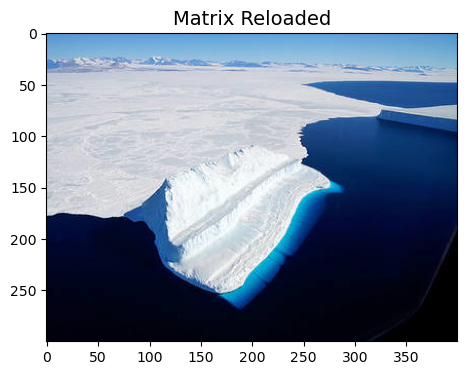

block shape = (300, 400, 3)


In [24]:
'''Produce Noise on a Matrix Image (brick data)'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

# Read image from the images/ directory in the chen-3170 repo
block = plt.imread('images/glacier.png', format='png')
#block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cp21.8-T.png', format='png')


plt.figure(1)
plt.imshow(block)
plt.title('Matrix Reloaded', fontsize=14)
plt.show()
print('block shape =', block.shape)  # inspect the array shape

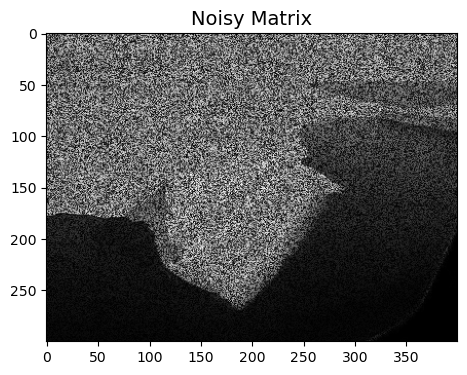

In [25]:
'''Use Matrix Element-by-Element Multiplication'''

mtrx_shape = block.shape[0:2]         # use the shape to automate noise_mtrx generation

noise_mtrx = np.random.random(mtrx_shape)   # generate random matrix

mtrx_noise = block[:,:,2] * noise_mtrx   # apply noise to the blue channel

plt.figure(2)
plt.imshow(mtrx_noise, cmap='gray')
plt.title('Noisy Matrix',fontsize=14)
plt.show()

In [28]:
mtrx_noise.shape

(300, 400)

In [29]:
'''Matrix Scaling (matrix product or division by a scalar)'''

mat1 = np.random.random((3,3))
print('mat1      =\n',mat1)

factor = 3.21
result = factor * mat1        # scaling of mat1 element-by-element; product with factor
print('scaled   =\n',result)

mat1      =
 [[0.601  0.0485 0.7467]
 [0.3061 0.3451 0.7578]
 [0.3873 0.6069 0.3492]]
scaled   =
 [[1.9292 0.1557 2.3968]
 [0.9827 1.1079 2.4326]
 [1.2432 1.948  1.1208]]


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="matscale"></a>

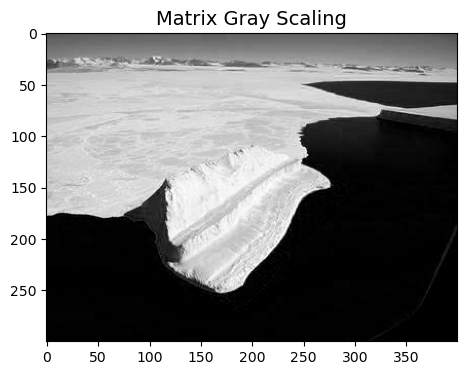

In [30]:
'''Matrix Scaling of an Image'''

color_channel = np.copy(block[:,:,0])   # copy the red channel

color_channel /= color_channel.max()    # scale to gray, 0-255 values
color_channel *= 255
gray_channel  = color_channel.astype(np.uint8) # truncate all float data type to unsigned int 8

plt.figure(3)
plt.imshow(gray_channel, cmap='gray')
#plt.imshow(gray_channel)

plt.title('Matrix Gray Scaling',fontsize=14)
plt.show()

#### [Element-by-element mathematical operations](#toc)<a id="matops"></a>

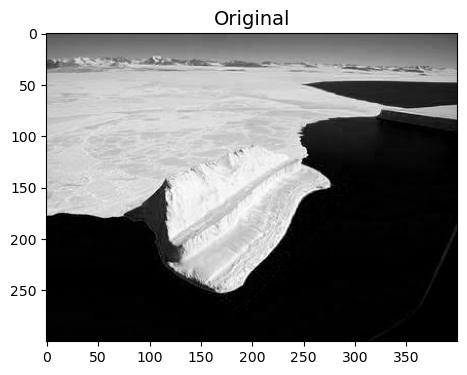

mean(mtrx) = 0.38594216
std(mtrx) = 0.37984067


In [31]:
'''Other Mathematical Operations on a Matrix'''

mtrx = np.copy(block[:,:,0])    # copy the red channel

plt.figure(4)
plt.imshow(mtrx, cmap='gray')              # show channel as a flat image with default colormap
plt.title('Original', fontsize=14)
plt.show()

mtrx_mean = mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

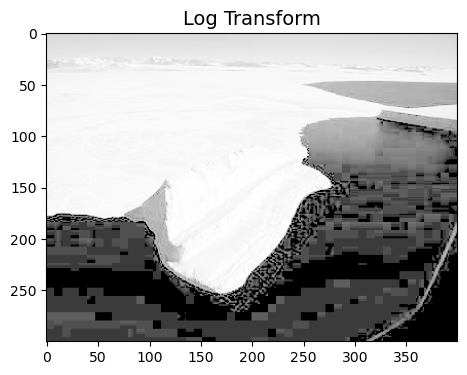

mean(mtrx) = -2.6418166
std(mtrx) = 2.5803103


In [32]:
'''Other Mathematical Operations on a Matrix'''

log_mtrx = np.log(mtrx + .001)  # natural log element-by-element

plt.figure(5)
plt.imshow(log_mtrx, cmap='gray')
plt.title('Log Transform', fontsize=14)
plt.show()

mtrx_mean = log_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = log_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

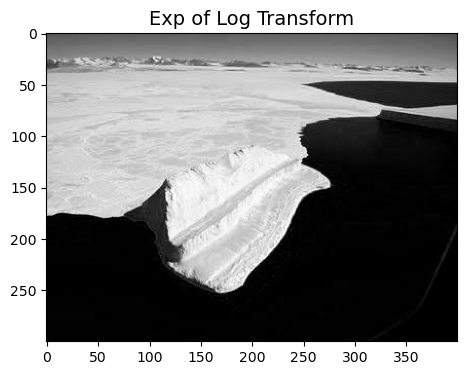

mean(mtrx) = 0.38694212
std(mtrx) = 0.37984067


In [33]:
'''Other Mathematical Operations on a Matrix'''

exp_mtrx = np.exp(log_mtrx)     # exponential

plt.figure(6)
plt.imshow(exp_mtrx, cmap='gray')
plt.title('Exp of Log Transform', fontsize=14)
plt.show()

mtrx_mean = exp_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = exp_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

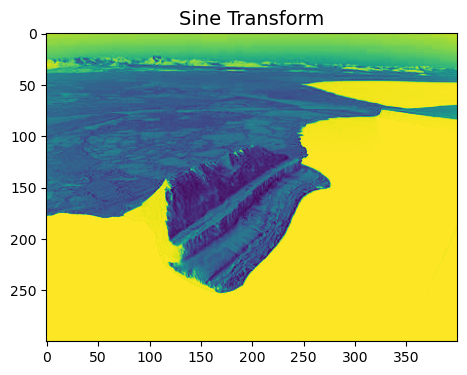

mean(mtrx) = 0.86122394
std(mtrx) = 0.1534877


In [34]:
'''Other Mathematical Operations on a Matrix'''

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

plt.figure(7)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_mean = sin_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = sin_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

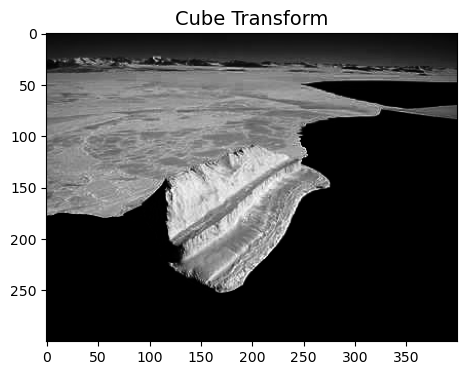

mean(mtrx) = 0.2348578
std(mtrx) = 0.28249925


In [35]:
'''Other Mathematical Operations on a Matrix'''

mtrx_cubed = mtrx**3  # powers

plt.figure(8)
plt.imshow(mtrx_cubed, cmap='gray')
plt.title('Cube Transform', fontsize=14)
plt.show()

mtrx_mean = mtrx_cubed.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx_cubed.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

#### [Transposition](#toc)<a id="mattransp"></a>

In [36]:
'''Matrix Transposition'''
'''clockwise rotation followed by horizontal right to left flip'''

mtrx = np.random.random((5,7))

np.set_printoptions(precision=3,threshold=20,edgeitems=12,linewidth=100) # one way to control printing of numpy arrays

print('mtrx =\n',mtrx)

mtrx_T = mtrx.transpose()       # transpose of a mtrx: M[i,j] -> M[j,i]

print('mtrx^T =\n', mtrx_T)

mtrx =
 [[0.524 0.364 0.023 0.355 0.977 0.329 0.028]
 [0.563 0.355 0.954 0.011 0.488 0.036 0.9  ]
 [0.998 0.731 0.842 0.592 0.579 0.358 0.14 ]
 [0.951 0.648 0.058 0.835 0.785 0.712 0.188]
 [0.387 0.941 0.334 0.788 0.073 0.964 0.909]]
mtrx^T =
 [[0.524 0.563 0.998 0.951 0.387]
 [0.364 0.355 0.731 0.648 0.941]
 [0.023 0.954 0.842 0.058 0.334]
 [0.355 0.011 0.592 0.835 0.788]
 [0.977 0.488 0.579 0.785 0.073]
 [0.329 0.036 0.358 0.712 0.964]
 [0.028 0.9   0.14  0.188 0.909]]


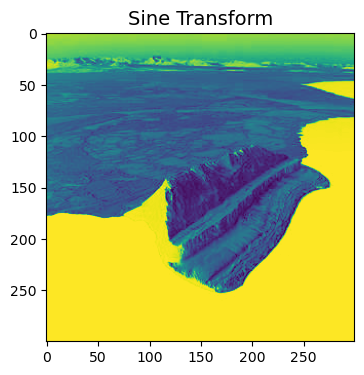

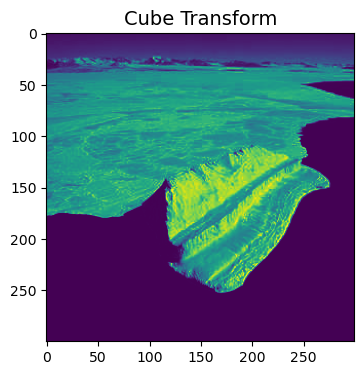

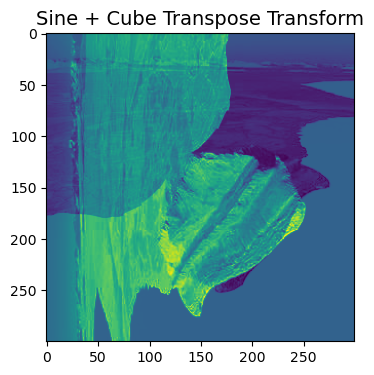

In [37]:
'''Matrix Transposition'''
'''Example of adding a transformed matrix to another transform transposed'''

'''note: to add a matrix to its transpose, a matrix must be square'''

n_rows = block.shape[0]
n_columns = n_rows

mtrx = np.copy(block[:n_rows,:n_columns,0])   # select a square block; red channel

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

sin_mtrx /= sin_mtrx.max()
plt.figure(9)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_cubed = mtrx**3                # powers

plt.figure(10)
plt.imshow(mtrx_cubed)
plt.title('Cube Transform', fontsize=14)
plt.show()

plt.figure(11)
plt.imshow(sin_mtrx + mtrx_cubed.transpose())    # sine + cubed transposed
plt.title('Sine + Cube Transpose Transform', fontsize=14)
plt.show()

#### [Element-by-element search](#toc)<a id="matsearch"></a>

In [38]:
'''Searching a matrix for entries matching a test'''

# what are the indices of the values in "mtrx" that satisfy: mtrx >= 0.3
(idx_ids, jdx_ids) = np.where(mtrx >= 0.3) 

np.set_printoptions(precision=3, threshold=20, edgeitems=5, linewidth=100) 

print('matrix =\n', mtrx)
print('ith indices = ',idx_ids)
print('jth indices = ',jdx_ids)

matrix =
 [[0.329 0.329 0.329 0.329 0.329 ... 0.384 0.384 0.384 0.384 0.384]
 [0.329 0.329 0.329 0.329 0.329 ... 0.388 0.388 0.388 0.388 0.388]
 [0.345 0.345 0.345 0.345 0.345 ... 0.392 0.392 0.392 0.392 0.392]
 [0.357 0.357 0.357 0.357 0.357 ... 0.4   0.4   0.4   0.4   0.4  ]
 [0.361 0.361 0.361 0.361 0.361 ... 0.408 0.408 0.408 0.408 0.408]
 ...
 [0.004 0.004 0.004 0.004 0.004 ... 0.004 0.004 0.004 0.004 0.004]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]]
ith indices =  [  0   0   0   0   0 ... 252 252 252 252 252]
jth indices =  [  0   1   2   3   4 ... 171 172 173 174 175]


In [39]:
'''Verify the searched elements'''

mtrx[idx_ids, jdx_ids].min()

0.3019608

In [42]:
mtrx[idx_ids, jdx_ids]

array([0.329, 0.329, 0.329, 0.329, 0.329, ..., 0.831, 0.737, 0.667, 0.58 , 0.459], dtype=float32)

In [40]:
mtrx[idx_ids, jdx_ids].shape

(54533,)

In [43]:
mtrx[idx_ids, jdx_ids].dtype

dtype('float32')